# CitiBike
## Statement
Normally, dressing code would affect the choice of biker riders for commute. 

### Null Hypothesis
Male rider's trip duration is not significantly longer than or is equal to the trip duration of female riders. 

### Alternative Hypothesis
Male rider's trip duration is longer or than the trip duration of female riders. 

# _$H_0$_ : $T_{\mathrm{Man}}<= T_{\mathrm{Woman}}$
# _$H_1$_ : $T_{\mathrm{Man}} > T_{\mathrm{Woman}}$

or identically:

# _$H_0$_ : $T_{\mathrm{Man}} - T_{\mathrm{Woman}} <= 0 $
# _$H_1$_ : $T_{\mathrm{Man}} - T_{\mathrm{Woman}} > 0$
## The significance level chosen is  $\alpha=0.05$

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json
os.environ["PUIDATA"] = "%s/PUIDATA"%os.getenv("HOME")
print("PUIdata", os.getenv("PUIDATA"))

Populating the interactive namespace from numpy and matplotlib
PUIdata /nfshome/amk742/PUIDATA


In [2]:
### A function to download the data: simple bash commands can be run by preceding them with !
### but more complex command lines with variable arguments need to be build as strng and run with os.system
### this code cell does a lot of things: looks for existing files, download a file if none is there, unzips it, moves it.
### you do not have to have a code cell this complicated. 
### As long as 
### 1) your research is reproducible: we can access the same file as you without having to ask you for the file
### 2) and your data is stored in a directory pointed to by the env variable PUIDATA 
### you will be fine. We already explored how to download data in other notebooks!

def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring = '201501'
getCitiBikeCSV(datestring)

file in place, you can continue


In [4]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960.0,2,2015-01-01 00:01:00
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963.0,1,2015-01-01 00:02:00
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974.0,1,2015-01-01 00:04:00
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969.0,1,2015-01-01 00:04:00
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977.0,1,2015-01-01 00:05:00


In [5]:
df_2c =df[['tripduration','gender']]
df_2c.head()

,tripduration,gender
0,1346,2
1,363,1
2,346,1
3,182,1
4,969,1


In [13]:
#x = df['tripduration'].groupby(df['gender']).unique()
x = df['tripduration'][df['gender'] == 1].groupby(df['tripduration']).unique()
y = x.sort_values()
y1 = x.count()
y1

3532

In [7]:
# male vs. Female Ridership based on trip duration. For the Null Hypthsis female duration is higher than male or equal to male trip 

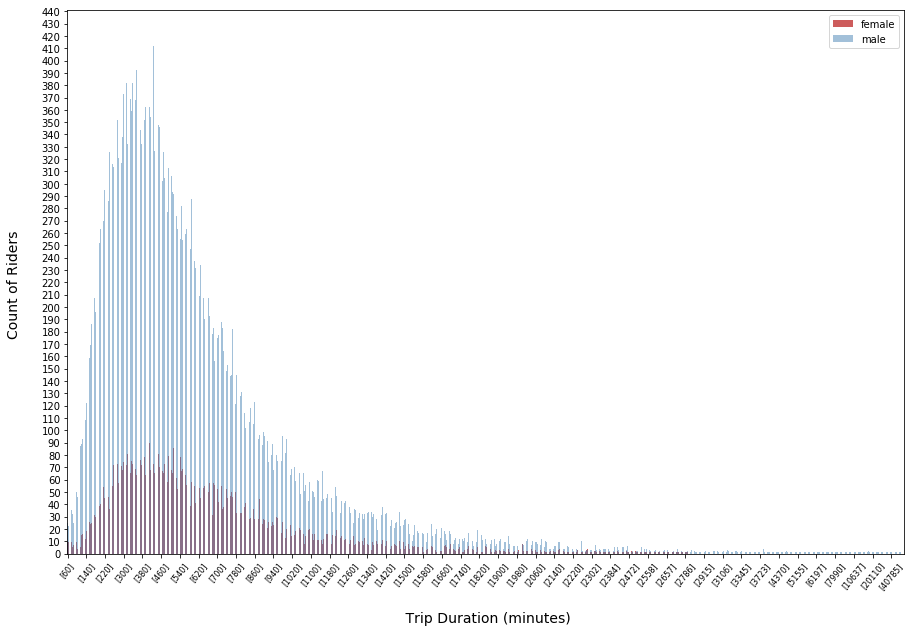

In [19]:
fig = pl.figure(figsize(15,10))

#instad of plotting with matplotlib i.e. plot() i use the plot method in pandas
norm_w = 1
((df['tripduration'][df['gender'] == 2].groupby(df['tripduration']).count())).plot(kind="bar", 
                                                                                         color='IndianRed', 
                                                                                         label='female')

norm_m = 1
ax = ((df['tripduration'][df['gender'] == 1].groupby(df['tripduration']).count())).plot(kind="bar", 
                                                                                              color='SteelBlue', 
                                                                                              alpha=0.5,
                                                                                              label='male')

#for i in range(y1):
 #   tmp = ax.xaxis.set_ticklabels(y[:i], fontsize=8, color='black', rotation = 70)
tmp = ax.xaxis.set_ticklabels(y[0::80], fontsize=8, color='black', rotation = 50)
ax.locator_params(nbins=45)
ax.set_ylabel('Count of Riders \n', fontsize = 14)
ax.set_xlabel('\n Trip Duration (minutes)', fontsize = 14)

pl.legend()

## Figure1. 
The plot indicates Male rides' trip duration is not significantly longer or equal to female trip duration. 